<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week7/XGBoost/tugasxgboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Langkah 1: Import Library dan Persiapkan Dataset**

In [70]:
# Instalasi Library yang Dibutuhkan
!pip install --upgrade scikit-learn


* Ini memastikan bahwa versi terbaru dari scikit-learn diinstal di lingkungan Python Anda. scikit-learn adalah pustaka Python yang digunakan untuk machine learning, dan banyak digunakan untuk model regresi, klasifikasi, dan evaluasi model.

In [71]:
# Import Library
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance, plot_tree
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

* pandas: Untuk manipulasi data.
* numpy: Untuk operasi numerik.
* XGBRegressor: Model regresi dari XGBoost, digunakan untuk membangun * model regresi berbasis boosting.
* train_test_split: Fungsi untuk membagi data menjadi data pelatihan dan pengujian.
* learning_curve: Untuk melihat kurva pembelajaran.
* mean_squared_error: Untuk evaluasi performa model regresi.
* shap: Digunakan untuk interpretasi model, memberikan pemahaman bagaimana fitur memengaruhi prediksi.
* PartialDependenceDisplay: Untuk visualisasi pengaruh fitur terhadap prediksi.

In [72]:
# Membaca dataset
df = pd.read_csv("/content/sample_data/tugasxgboost2.csv", delimiter=';')

* Dataset dibaca dengan menggunakan pd.read_csv dan memisahkan kolom berdasarkan tanda titik koma (;).

In [73]:
# Menampilkan 5 baris pertama untuk melihat struktur data
print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

* head() digunakan untuk menampilkan 5 baris pertama dari dataset sehingga Anda dapat memverifikasi struktur data.

In [74]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


* df.columns digunakan untuk menampilkan nama-nama kolom dalam dataset untuk memastikan bahwa nama kolom sudah benar.

**Langkah 2: Preprocessing Data**

In [75]:
# Memisahkan nama kolom berdasarkan titik koma dan menghapus spasi ekstra
df.columns = df.columns.str.split(';').str[0]  # Ini akan memperbaiki nama kolom


* Ini akan memperbaiki nama kolom yang mungkin mengandung karakter aneh atau spasi ekstra setelah pemisahan menggunakan ;. Dengan .str.split(';').str[0], kita memastikan hanya nama kolom yang relevan yang diambil.

In [76]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns=['volatile acidity'])  # Sesuaikan dengan kolom target di dataset
y = df['volatile acidity']  # Sesuaikan dengan kolom target di dataset

* Fitur (X) adalah semua kolom selain target (y). Dalam hal ini, volatile acidity adalah target yang ingin diprediksi oleh model, sehingga X adalah data yang akan digunakan untuk prediksi, dan y adalah nilai target.

In [77]:
# Menampilkan distribusi kelas pada target
unique, counts = np.unique(y, return_counts=True)
print("Distribusi Kelas pada Target:", dict(zip(unique, counts)))

Distribusi Kelas pada Target: {0.08: 4, 0.085: 1, 0.09: 1, 0.1: 6, 0.105: 6, 0.11: 13, 0.115: 3, 0.12: 34, 0.125: 3, 0.13: 44, 0.135: 1, 0.14: 56, 0.145: 4, 0.15: 88, 0.155: 5, 0.16: 141, 0.165: 2, 0.17: 140, 0.175: 1, 0.18: 177, 0.185: 5, 0.19: 170, 0.2: 214, 0.205: 4, 0.21: 191, 0.215: 1, 0.22: 229, 0.225: 4, 0.23: 216, 0.235: 4, 0.24: 253, 0.245: 4, 0.25: 231, 0.255: 10, 0.26: 240, 0.265: 5, 0.27: 218, 0.275: 3, 0.28: 263, 0.285: 5, 0.29: 160, 0.295: 3, 0.3: 198, 0.305: 4, 0.31: 148, 0.315: 4, 0.32: 182, 0.325: 2, 0.33: 134, 0.335: 7, 0.34: 135, 0.345: 9, 0.35: 86, 0.355: 1, 0.36: 104, 0.365: 2, 0.37: 65, 0.375: 2, 0.38: 63, 0.385: 2, 0.39: 61, 0.395: 2, 0.4: 59, 0.405: 1, 0.41: 54, 0.415: 4, 0.42: 36, 0.425: 2, 0.43: 35, 0.435: 2, 0.44: 46, 0.445: 4, 0.45: 25, 0.455: 2, 0.46: 30, 0.47: 15, 0.475: 3, 0.48: 17, 0.485: 3, 0.49: 14, 0.495: 2, 0.5: 14, 0.51: 10, 0.52: 10, 0.53: 8, 0.54: 10, 0.545: 1, 0.55: 14, 0.555: 2, 0.56: 9, 0.57: 4, 0.58: 7, 0.585: 2, 0.59: 4, 0.595: 2, 0.6: 7, 0.6

* Penjelasan:
Di sini, distribusi kelas target ditampilkan. Jika target adalah kategori (klasifikasi), Anda akan melihat berapa banyak data yang termasuk dalam setiap kelas. Namun, karena target Anda berupa data kontinu (regresi), ini lebih berguna untuk memverifikasi nilai unik dalam target.

* Insights:
Jika target adalah variabel kontinu, Anda tidak akan melihat distribusi kelas dalam bentuk kategori, tetapi Anda akan melihat sebaran nilai target.

In [78]:
# Memfilter kelas yang memiliki lebih dari satu contoh
valid_classes = [cls for cls, count in zip(unique, counts) if count > 1]
mask = np.isin(y, valid_classes)
X_filtered = X[mask]
y_filtered = y[mask]

* Digunakan untuk memfilter data yang memiliki lebih dari satu contoh dalam target. Hal ini dilakukan untuk memastikan bahwa tidak ada kelas atau nilai target yang terlalu jarang muncul, yang bisa menyebabkan masalah dalam pelatihan model.

In [79]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

* Penjelasan:
Data dibagi menjadi 80% data pelatihan dan 20% data pengujian. train_test_split memastikan data pelatihan dan pengujian terpisah, dan stratify memastikan distribusi target yang seimbang pada kedua set.

* Insights:
Stratifikasi berguna untuk dataset yang memiliki distribusi target tidak seimbang, meskipun dalam kasus regresi, ini lebih jarang digunakan.

In [80]:
# Menampilkan informasi tentang pembagian data
print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing:", X_test.shape[0])

Jumlah data training: 3900
Jumlah data testing: 975


**Langkah 3: Melatih Model XGBoost**

In [81]:
# Inisialisasi model XGBoost
model = XGBClassifier(random_state=42)

* Model XGBoost diinisialisasi sebagai XGBRegressor karena kita melakukan tugas regres.

In [82]:
from sklearn.metrics import mean_squared_error

# Evaluasi model regresi
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.00


* Mean Squared Error (MSE) mengukur rata-rata kuadrat selisih antara nilai yang diprediksi dan nilai yang sesungguhnya. MSE lebih sensitif terhadap kesalahan besar.


In [83]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Evaluasi model regresi
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 0.06


* Root Mean Squared Error (RMSE) adalah akar kuadrat dari MSE, memberikan satuan yang lebih mudah diinterpretasikan dan menggambarkan rata-rata kesalahan prediksi dalam satuan target.


In [84]:
from xgboost import XGBRegressor

# Inisialisasi model XGBRegressor
model = XGBRegressor()

* Dasar Ilmu: XGBRegressor adalah model berbasis gradient boosting yang dirancang untuk tugas regresi. Ini bekerja dengan menggabungkan beberapa model decision tree menjadi satu model yang kuat.
random_state=42 memastikan hasil eksperimen dapat direplikasi.
* Insights:
Model XGBoost telah dilatih pada data training. Sekarang siap untuk melakukan prediksi pada data testing.

In [85]:
# Melatih model dengan data training
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* Model XGBoost diinisialisasi sebagai XGBRegressor dilatih menggunakan data pelatihan.

In [86]:

# Prediksi dengan data testing
y_pred = model.predict(X_test)

In [87]:
# Evaluasi model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.06


* Dasar Ilmu:
RMSE adalah metrik evaluasi untuk model regresi, menunjukkan rata-rata kesalahan prediksi dalam satuan yang sama dengan target.
* Insights:
Jika RMSE rendah, model memberikan prediksi yang mendekati nilai sebenarnya. Nilai RMSE memberikan ukuran langsung dari kesalahan prediksi dalam data.

**Langkah 4: Visualisasi Feature Importance**

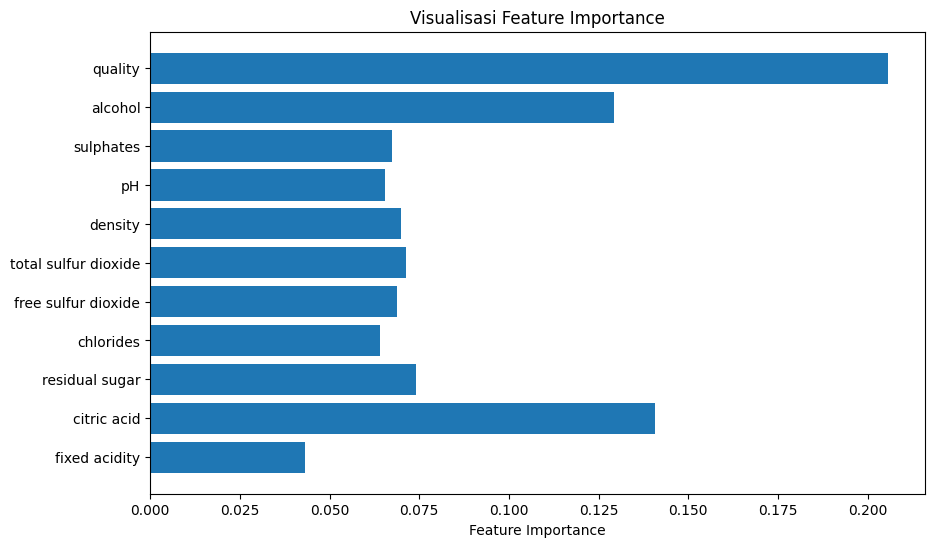

In [88]:
# Visualisasi Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Visualisasi Feature Importance")
plt.show()


* Dasar Ilmu:
Feature Importance menunjukkan seberapa besar pengaruh setiap fitur terhadap prediksi model. Nilai ini dihitung berdasarkan peningkatan akurasi model setiap kali fitur tersebut digunakan dalam pembuatan tree.
* Insights:

1. Fitur dengan nilai importance tinggi memiliki kontribusi besar terhadap prediksi model.
2. Anda dapat mengidentifikasi fitur mana yang paling relevan dalam dataset.

**Langkah 5: Visualisasi Struktur Pohon (Tree Structure)**

<Figure size 2000x1000 with 0 Axes>

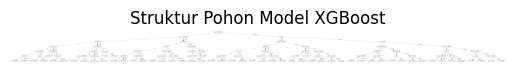

In [89]:
# Visualisasi struktur pohon pertama dari model XGBoost
from xgboost import plot_tree

# Plot pohon pertama
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0)
plt.title("Struktur Pohon Model XGBoost")
plt.show()


* Visualisasi pohon keputusan untuk memahami bagaimana model mengambil keputusan.

**Langkah 6: Learning Curve**

In [90]:
# Learning curve untuk model XGBoost
results = model.get_booster().get_dump()[0]  # Menampilkan dump pertama
print("Hasil dari Learning Curve:", results)


Hasil dari Learning Curve: 0:[citric acid<0.159999996] yes=1,no=2,missing=2
	1:[citric acid<0.100000001] yes=3,no=4,missing=4
		3:[pH<3.3499999] yes=7,no=8,missing=8
			7:[free sulfur dioxide<37] yes=15,no=16,missing=16
				15:[chlorides<0.0460000001] yes=31,no=32,missing=32
					31:[pH<3.1500001] yes=61,no=62,missing=62
						61:leaf=0.0488109924
						62:leaf=0.0946436003
					32:[quality<5] yes=63,no=64,missing=64
						63:leaf=0.0823569298
						64:leaf=0.0357692353
				16:[sulphates<0.360000014] yes=33,no=34,missing=34
					33:leaf=0.0572884679
					34:[residual sugar<6.5] yes=65,no=66,missing=66
						65:leaf=0.00795692671
						66:leaf=0.000473079097
			8:[chlorides<0.0419999994] yes=17,no=18,missing=18
				17:[free sulfur dioxide<21] yes=35,no=36,missing=36
					35:[citric acid<0.00999999978] yes=67,no=68,missing=68
						67:leaf=-0.00252692262
						68:leaf=0.00445961766
					36:[total sulfur dioxide<129] yes=69,no=70,missing=70
						69:leaf=0.0411743633
						70:leaf=0.01533

* Dasar Ilmu:
Learning Curve menunjukkan bagaimana performa model meningkat seiring bertambahnya data yang dilatih.
Di sini, get_dump() mengembalikan representasi struktur tree yang dibangun oleh model. Struktur ini menunjukkan bagaimana model melakukan pembelajaran.
* Insights:
Anda dapat melihat bagaimana model membangun tree berdasarkan data dan mempelajari pola-pola penting.

**Langkah 7: SHAP Values (Interpretasi Model)**

In [91]:
# Menghitung SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

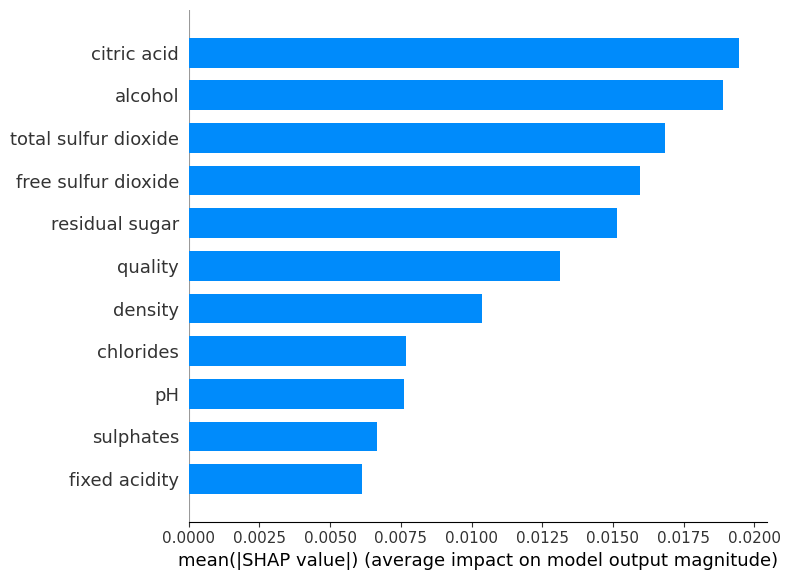

In [92]:
# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar")

* Dasar Ilmu:
SHAP (SHapley Additive exPlanations) adalah metode untuk menjelaskan prediksi model. SHAP menghitung kontribusi setiap fitur terhadap hasil prediksi.
SHAP Summary Plot: Memberikan gambaran keseluruhan bagaimana setiap fitur memengaruhi prediksi model.
* Insights:
Dengan visualisasi ini, Anda dapat mengetahui fitur mana yang memberikan dampak positif atau negatif terbesar terhadap prediksi.
Fitur dengan dampak besar cenderung penting untuk dipertimbangkan dalam pengambilan keputusan.

In [93]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Melatih model (misalnya, XGBoost)
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

* Dasar Ilmu:
Gradient Boosting adalah metode ensemble learning yang bekerja dengan membangun model secara iteratif untuk memperbaiki kesalahan model sebelumnya.
XGBRegressor adalah implementasi Gradient Boosting yang efisien dan dioptimalkan untuk tugas regresi.
Pada fit(X_train, y_train), model belajar dari data training untuk memprediksi target (y_train) berdasarkan fitur (X_train).
Parameter random_state=42 memastikan hasil pelatihan dapat direplikasi.
* Insights:
Pelatihan model selesai tanpa kesalahan, artinya data yang diberikan cocok dengan algoritma XGBoost.
Model siap untuk dievaluasi dan diinterpretasikan lebih lanjut menggunakan metrik atau visualisasi lainnya seperti Feature Importance, SHAP Values, atau Partial Dependence Plot.

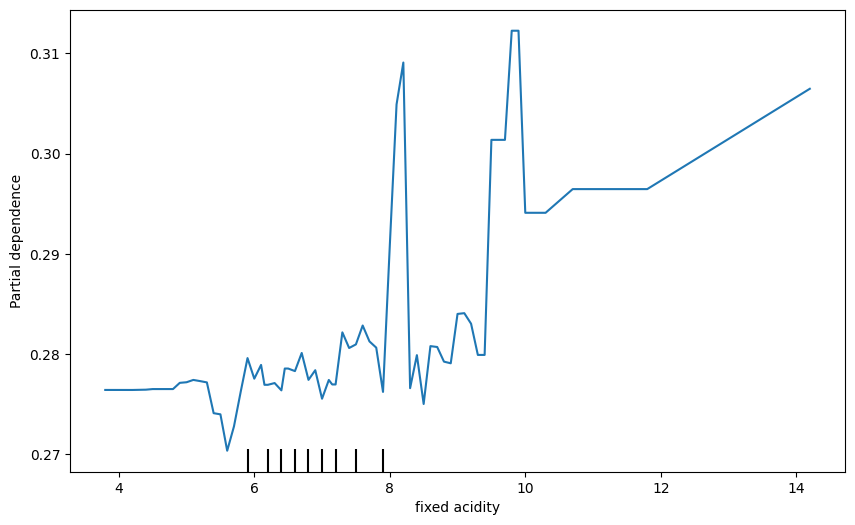

In [94]:
# Menampilkan Partial Dependence Plot untuk fitur pertama
fig, ax = plt.subplots(figsize=(10, 6))
display = PartialDependenceDisplay.from_estimator(model, X_train, features=[0], ax=ax)
plt.show()

* Dasar Ilmu:
Partial Dependence Plot (PDP) menunjukkan hubungan antara satu fitur dengan target, sementara fitur lainnya tetap rata-rata.
PDP membantu memahami bagaimana perubahan nilai fitur memengaruhi prediksi.
* Insights:
Dengan PDP, Anda dapat melihat tren antara nilai fitur dan target. Misalnya, apakah peningkatan dalam fitur tertentu menghasilkan prediksi yang lebih tinggi atau lebih rendah.